## Import Required Libraries
I imported libraries required for model training and evaluation (pandas, sklearn, matplotlib, and seaborn).

DecisionTreeClassifier and RandomForestClassifier are used to create the machine learning models.

accuracy_score is used to evaluate model performance.



In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Split the Dataset
The training and test datasets are loaded.

I separated the features (X_train, X_test) from the target variable (y_train, y_test), where fire is the target variable indicating if a wildfire occurred or not.

In [20]:
# Load the training and test datasets
train_data = pd.read_csv('wildfires_training.csv')
test_data = pd.read_csv('wildfires_test.csv')

# Split the dataset into features (X) and target (y)
X_train = train_data.drop('fire', axis=1)  # Features
y_train = train_data['fire']  # Target

X_test = test_data.drop('fire', axis=1)  # Test features
y_test = test_data['fire']  # Test target

# Print the first few rows of train and test datasets
print(train_data.head())
print(test_data.head())

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  
  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no  2007    23        74       8.3          7.36           2.27   14   
4   no  2017    31       

## Define Hyperparameter Ranges for Decision Trees
I defined the two important hyperparameters for the DecisionTreeClassifier:
max_depth: Limits the depth of the tree.

min_samples_split: The minimum number of samples required to split a node.

Ranges of values are provided for these hyperparameters, which we will test in the next step.

In [11]:
# Define hyperparameter ranges to test for Decision Tree
max_depth_values = [3, 5, 7, 10, 15]
min_samples_split_values = [2, 5, 10, 20]

##  Evaluate Decision Tree Performance with Different Hyperparameters
A loop is used to train the DecisionTreeClassifier for different combinations of max_depth and min_samples_split.

For each combination, the model is trained on the training data (X_train, y_train) and tested on the test data (X_test, y_test).

The test accuracy is stored in a list dt_results, which is later converted into a DataFrame for easy plotting.


In [19]:
# Store results for Decision Tree
dt_results = []

# Loop over hyperparameter values for Decision Tree
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        dt_model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        dt_model.fit(X_train, y_train)
        y_train_pred = dt_model.predict(X_train)
        y_test_pred = dt_model.predict(X_test)
        
        # Calculate accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Store results
        dt_results.append({
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy
        })
        
        # Print accuracy for each hyperparameter combination
        print(f"Decision Tree - max_depth: {max_depth}, min_samples_split: {min_samples_split}")
        print(f"Training Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}\n")

# Convert Decision Tree results to DataFrame
dt_results_df = pd.DataFrame(dt_results)


Decision Tree - max_depth: 3, min_samples_split: 2
Training Accuracy: 0.94, Test Accuracy: 0.88

Decision Tree - max_depth: 3, min_samples_split: 5
Training Accuracy: 0.94, Test Accuracy: 0.88

Decision Tree - max_depth: 3, min_samples_split: 10
Training Accuracy: 0.94, Test Accuracy: 0.88

Decision Tree - max_depth: 3, min_samples_split: 20
Training Accuracy: 0.91, Test Accuracy: 0.84

Decision Tree - max_depth: 5, min_samples_split: 2
Training Accuracy: 0.97, Test Accuracy: 0.86

Decision Tree - max_depth: 5, min_samples_split: 5
Training Accuracy: 0.97, Test Accuracy: 0.86

Decision Tree - max_depth: 5, min_samples_split: 10
Training Accuracy: 0.95, Test Accuracy: 0.88

Decision Tree - max_depth: 5, min_samples_split: 20
Training Accuracy: 0.93, Test Accuracy: 0.84

Decision Tree - max_depth: 7, min_samples_split: 2
Training Accuracy: 1.00, Test Accuracy: 0.86

Decision Tree - max_depth: 7, min_samples_split: 5
Training Accuracy: 0.99, Test Accuracy: 0.86

Decision Tree - max_depth:

## Plot the Impact of Decision Tree Hyperparameters
I used seaborn to plot how test accuracy changes as max_depth and min_samples_split vary.

This helps in visualizing which hyperparameters have a stronger impact on model performance.


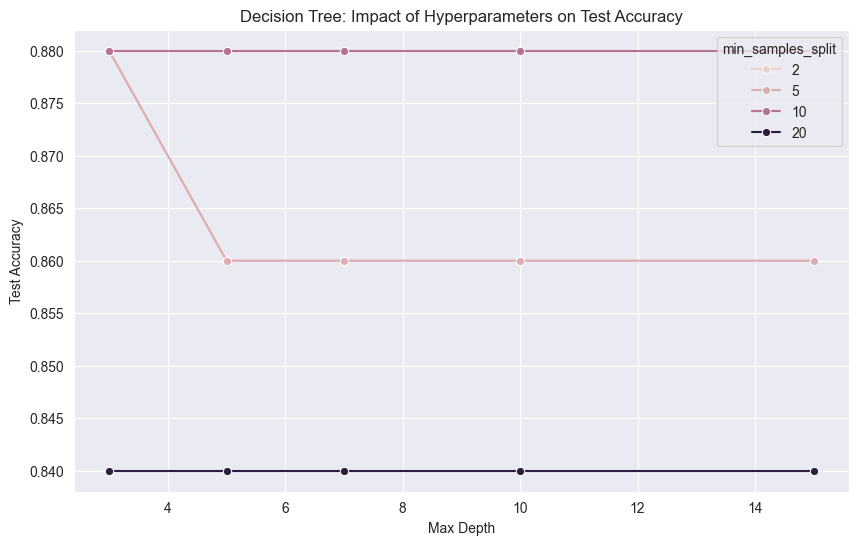

In [13]:
# Plot Decision Tree Hyperparameter Impact
plt.figure(figsize=(10, 6))
sns.lineplot(x='max_depth', y='test_accuracy', hue='min_samples_split', marker="o", data=dt_results_df)
plt.title('Decision Tree: Impact of Hyperparameters on Test Accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('Max Depth')
plt.show()

## Define Hyperparameter Ranges for Random Forests
Two key hyperparameters for the RandomForestClassifier are defined:

n_estimators: The number of trees in the forest.

max_depth: The maximum depth of the trees.

The ranges for these hyperparameters will be tested in the next step.


In [14]:
# Define hyperparameter ranges to test for Random Forest
n_estimators_values = [50, 100, 150, 200]
max_depth_values_rf = [5, 10, 15, 20]

## Evaluate Random Forest Performance with Different Hyperparameters
I looped through different combinations of n_estimators and max_depth values to train and test the RandomForestClassifier.

The accuracy of each combination is stored in a list and converted into a DataFrame for easy visualization.

In [18]:
# Store results for Random Forest
rf_results = []

# Loop over hyperparameter values for Random Forest
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values_rf:
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train, y_train)
        y_train_pred = rf_model.predict(X_train)
        y_test_pred = rf_model.predict(X_test)
        
        # Calculate accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Store results
        rf_results.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy
        })
        
        # Print accuracy for each hyperparameter combination
        print(f"Random Forest - n_estimators: {n_estimators}, max_depth: {max_depth}")
        print(f"Training Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}\n")

# Convert Random Forest results to DataFrame for easier plotting
rf_results_df = pd.DataFrame(rf_results)


Random Forest - n_estimators: 50, max_depth: 5
Training Accuracy: 0.98, Test Accuracy: 0.86

Random Forest - n_estimators: 50, max_depth: 10
Training Accuracy: 1.00, Test Accuracy: 0.84

Random Forest - n_estimators: 50, max_depth: 15
Training Accuracy: 1.00, Test Accuracy: 0.84

Random Forest - n_estimators: 50, max_depth: 20
Training Accuracy: 1.00, Test Accuracy: 0.84

Random Forest - n_estimators: 100, max_depth: 5
Training Accuracy: 0.99, Test Accuracy: 0.86

Random Forest - n_estimators: 100, max_depth: 10
Training Accuracy: 1.00, Test Accuracy: 0.84

Random Forest - n_estimators: 100, max_depth: 15
Training Accuracy: 1.00, Test Accuracy: 0.84

Random Forest - n_estimators: 100, max_depth: 20
Training Accuracy: 1.00, Test Accuracy: 0.84

Random Forest - n_estimators: 150, max_depth: 5
Training Accuracy: 0.99, Test Accuracy: 0.84

Random Forest - n_estimators: 150, max_depth: 10
Training Accuracy: 1.00, Test Accuracy: 0.82

Random Forest - n_estimators: 150, max_depth: 15
Training

## Plot the Impact of Random Forest Hyperparameters
This plot shows how the test accuracy of the RandomForestClassifier changes with different combinations of n_estimators and max_depth.

The plot will help us understand which hyperparameter has the most significant effect on performance.


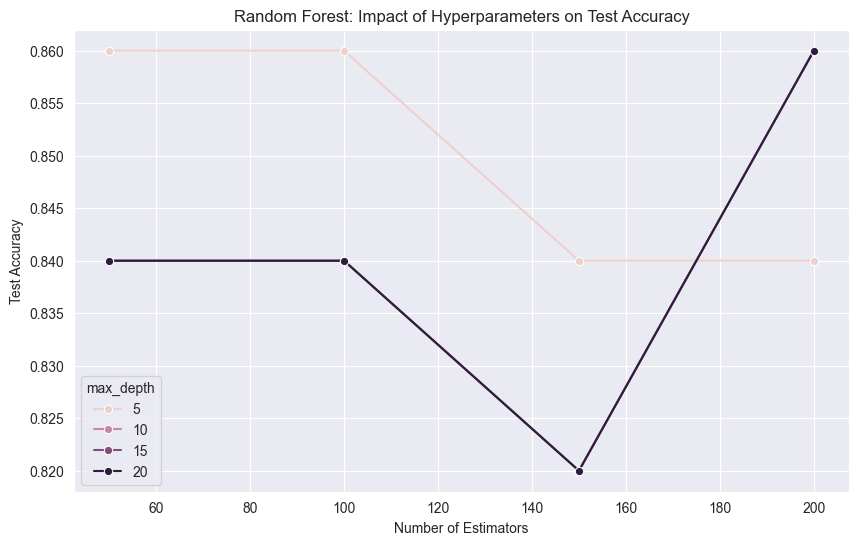

In [16]:
# Plot Random Forest Hyperparameter Impact
plt.figure(figsize=(10, 6))
sns.lineplot(x='n_estimators', y='test_accuracy', hue='max_depth', marker="o", data=rf_results_df)
plt.title('Random Forest: Impact of Hyperparameters on Test Accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('Number of Estimators')
plt.show()